In [2]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

In [3]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [7]:
x, y = createDataPoints([[4,3], [2, -1], [-1,4]], 1500, 0.5)
print(x)
print(y)

[[-1.32058432  1.04223229]
 [ 1.14998049  1.05100495]
 [-1.15756684  0.9997387 ]
 ...
 [-1.25760223  0.59405788]
 [ 1.04863518  0.57725498]
 [ 0.22754707 -1.41111003]]
[2 0 2 ... 2 0 1]


In [13]:
# determine special radius
epsilon = 0.3
# the minimum number of data points
minimumSamples = 7
db = DBSCAN (eps = epsilon, min_samples = minimumSamples).fit(x)
labels = db.labels_
labels

array([0, 1, 0, ..., 0, 1, 2])

### Replace all elements with True for core and False for outlier

In [14]:
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
#Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))-(1 if -1in labels else 0)
n_clusters_

<>:2: SyntaxWarning: invalid decimal literal
<>:2: SyntaxWarning: invalid decimal literal
/var/folders/kz/nw3xlnss33sbdxg49r5xk6dm0000gn/T/ipykernel_1060/313447480.py:2: SyntaxWarning: invalid decimal literal
  n_clusters_ = len(set(labels))-(1 if -1in labels else 0)


3

In [16]:
#remove repetition in labels by turning it into a set.
unique_labels = set (labels)
unique_labels

{0, 1, 2}

### Visualization

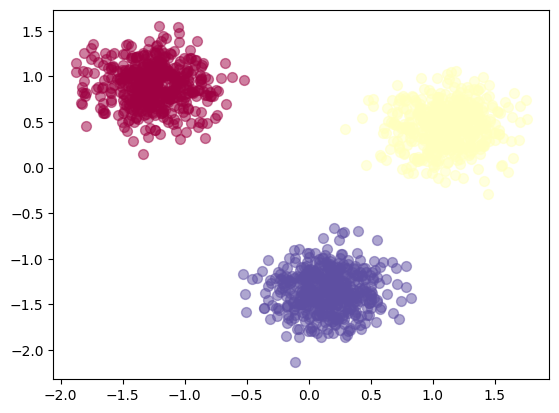

In [19]:
# Plot the points with colors
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)